# **Лабораторна робота 5: Використання Boosting моделей для прогнозування**
**Всі завдання виконуються індивідуально. Використання запозиченого коду буде оцінюватись в 0 балів.**

**Лабораторні роботи де в коді буде використаня КИРИЛИЦІ будуть оцінюватись в 20 балів.**

#### **Мета роботи:**
Ознайомитись з принципами роботи Boosting моделей, навчитися застосовувати три різні Boosting алгоритми (AdaBoost, Gradient Boosting, XGBoost) для розв'язання задач прогнозування, налаштовувати параметри моделей, зокрема параметри регуляризації, для підвищення їх продуктивності.

#### **Завдання:**

1. **Підготовка даних**:
   - Завантажте та підготуйте датасет для регресії або класифікації: (наприклад, **[дані про ціни на житло](https://)** або **[діабет](https://www.kaggle.com/datasets/pkdarabi/diabetes-dataset-with-18-features)**). Розбийте дані на навчальну та тестову вибірки (наприклад, 80/20).
   
2. **Побудова трьох Boosting моделей**:
   - **AdaBoost**: Побудуйте модель на базі дерев рішень як базових моделей.
   - **Gradient Boosting**: Використайте бібліотеку Scikit-learn для створення Gradient Boosting моделі для прогнозування.
   - **XGBoost**: Використайте бібліотеку XGBoost для побудови більш оптимізованої моделі.

3. **Навчання та оцінка моделей**:
   - Для кожної моделі виведіть метрики оцінки, такі як точність (classification accuracy) або середньоквадратична помилка (MSE) для регресії.
   - Побудуйте графіки навчання для візуалізації процесу.

4. **Тонке налаштування параметрів (Hyperparameter Tuning)**:
   - Для кожної моделі налаштуйте наступні параметри:
     - **AdaBoost**: Кількість базових моделей (n_estimators), learning_rate.
     - **Gradient Boosting**: Максимальна глибина дерев (max_depth), кількість дерев (n_estimators), learning_rate.
     - **XGBoost**: Кількість дерев (n_estimators), learning_rate, max_depth, subsample.
   - Використайте крос-валідацію для підбору оптимальних параметрів.

5. **Регуляризація**:
   - Додайте **L1 та L2 регуляризацію** для Gradient Boosting та XGBoost моделей (в XGBoost параметри `alpha` для L1 та `lambda` для L2).
   - Виведіть результати з регуляризацією і порівняйте з результатами без регуляризації.

6. **Порівняння моделей**:
   - Проведіть порівняння трьох моделей за основними метриками продуктивності на тестових даних.
   - Проаналізуйте, як регуляризація впливає на результати моделей. В яких випадках вона покращує модель, а в яких — погіршує.

7. **Захист роботи**:
   - Поясніть, яку модель і чому ви вважаєте найкращою для вирішення вашої задачі.
   - Опишіть, як впливала регуляризація на продуктивність моделей, та що б ви змінили в параметрах для кращого результату.

#### **Додаткові вимоги:**
- Забезпечити відображення важливості ознак у кожній з моделей (feature importance).
- Побудувати графіки для візуалізації залежності продуктивності від зміни гіперпараметрів (наприклад, залежність від кількості дерев або learning_rate).


#### **Додаткові набори даних:**

1. **Diabetes Dataset** — містить медичні дані пацієнтів, які можуть бути використані для прогнозування наявності діабету. Він доступний за посиланням: [Diabetes Dataset](https://www.kaggle.com/datasets/mathchi/diabetes-data-set).

2. **Diabetes Health Indicators Dataset** — великий датасет з понад 250 тисячами записів, який містить індикатори здоров'я для визначення ризику діабету. Підходить для класифікаційних задач. Доступний за посиланням: [Diabetes Health Indicators Dataset](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset).

3. **California Housing Prices** — датасет, що містить інформацію про ціни на житло у різних округах штату Каліфорнія, включаючи такі параметри, як середній дохід домогосподарств, кількість мешканців тощо. Він добре підходить для регресійних моделей. Доступний за посиланням: [California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

4. **House Prices - Advanced Regression Techniques** — більш комплексний датасет, який використовується для вдосконалення регресійних моделей. Включає більше 70 ознак, що описують різні аспекти нерухомості, ідеальний для глибокого аналізу та тонкого налаштування моделей. Доступний тут: [House Prices - Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

Ці набори даних ви також можете використовувати для виконання завдань Лабораторної роботи 5.

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [62]:
df_diabetes = pd.read_csv('diabetes.csv')
df_diabetes.head()

,Age,Gender,BMI,SBP,DBP,FPG,Chol,Tri,HDL,LDL,ALT,BUN,CCR,FFPG,smoking,drinking,family_histroy,Diabetes
0,26,1,20.1,119,81,5.80,4.36,0.86,0.90,2.43,12.0,5.40,63.8,5.40,3.0,3.0,0,0
1,40,1,17.7,97,54,4.60,3.70,1.02,1.50,2.04,9.2,3.70,70.3,4.10,1.0,1.0,0,0
2,40,2,19.7,85,53,5.30,5.87,1.29,1.75,3.37,10.1,4.10,61.1,4.85,3.0,3.0,0,0
3,43,1,23.1,111,71,4.50,4.05,0.74,1.27,2.60,36.5,4.38,73.4,5.30,2.0,3.0,0,0
4,36,1,26.5,130,82,5.54,6.69,3.49,0.91,3.64,69.3,3.86,67.5,5.53,3.0,3.0,0,0


In [63]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4303 entries, 0 to 4302
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             4303 non-null   int64  
 1   Gender          4303 non-null   int64  
 2   BMI             4303 non-null   float64
 3   SBP             4303 non-null   int64  
 4   DBP             4303 non-null   int64  
 5   FPG             4303 non-null   float64
 6   Chol            4303 non-null   float64
 7   Tri             4303 non-null   float64
 8   HDL             4303 non-null   float64
 9   LDL             4303 non-null   float64
 10  ALT             4303 non-null   float64
 11  BUN             4303 non-null   float64
 12  CCR             4303 non-null   float64
 13  FFPG            4303 non-null   float64
 14  smoking         4303 non-null   float64
 15  drinking        4303 non-null   float64
 16  family_histroy  4303 non-null   int64  
 17  Diabetes        4303 non-null   i

In [64]:
df_diabetes.drop_duplicates()

,Age,Gender,BMI,SBP,DBP,FPG,Chol,Tri,HDL,LDL,ALT,BUN,CCR,FFPG,smoking,drinking,family_histroy,Diabetes
0,26,1,20.1,119,81,5.80,4.36,0.86,0.90,2.43,12.0,5.40,63.8,5.40,3.000000,3.000000,0,0
1,40,1,17.7,97,54,4.60,3.70,1.02,1.50,2.04,9.2,3.70,70.3,4.10,1.000000,1.000000,0,0
2,40,2,19.7,85,53,5.30,5.87,1.29,1.75,3.37,10.1,4.10,61.1,4.85,3.000000,3.000000,0,0
3,43,1,23.1,111,71,4.50,4.05,0.74,1.27,2.60,36.5,4.38,73.4,5.30,2.000000,3.000000,0,0
4,36,1,26.5,130,82,5.54,6.69,3.49,0.91,3.64,69.3,3.86,67.5,5.53,3.000000,3.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4298,54,1,23.4,126,75,6.82,5.00,1.50,1.24,2.98,8.0,3.50,77.0,6.70,1.000000,3.000000,0,1
4299,50,2,22.3,115,84,5.32,4.37,2.09,1.37,2.29,21.2,4.40,47.3,6.55,4.860753,4.860753,0,1
4300,67,1,24.6,138,81,4.85,3.89,1.38,1.14,2.17,18.1,4.73,70.6,6.80,3.000000,3.000000,0,1
4301,60,2,29.0,101,60,6.70,5.91,1.29,1.73,2.85,18.9,7.33,50.2,7.00,3.000000,3.000000,0,1


In [65]:
scaler = StandardScaler()

X = df_diabetes.drop("Diabetes", axis=1)
y = df_diabetes["Diabetes"]

X_train_unscaled, x_test_unscaled, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = scaler.fit_transform(X_train_unscaled)
x_test = scaler.transform(x_test_unscaled)

***AdaBoost based on decision trees***

In [66]:
base_estimator  = DecisionTreeClassifier(max_depth=1)

ada_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1]
}

ada_boost_model = AdaBoostClassifier(estimator=base_estimator , n_estimators=50, random_state=40)
ada_boost_model.fit(X_train, y_train)

ada_cv = GridSearchCV(ada_boost_model, param_grid=ada_params, cv=5, scoring='accuracy')
ada_cv.fit(X_train, y_train)

# Найкращі параметри
print(f"best parametrs AdaBoost: {ada_cv.best_params_}")

y_pred = ada_cv.predict(x_test)

print(f"precision AdaBoost: {accuracy_score(y_test, y_pred)}")

best parametrs AdaBoost: {'learning_rate': 0.1, 'n_estimators': 100}
precision AdaBoost: 0.9442508710801394


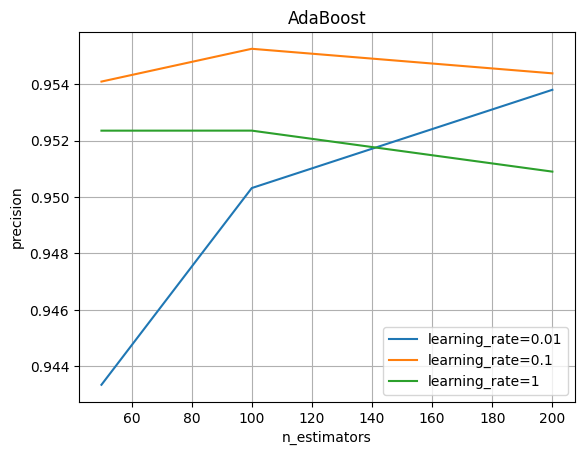

In [67]:
results_ada = ada_cv.cv_results_['mean_test_score']

plt.plot([50, 100, 200], results_ada[:3], label='learning_rate=0.01')
plt.plot([50, 100, 200], results_ada[3:6], label='learning_rate=0.1')
plt.plot([50, 100, 200], results_ada[6:], label='learning_rate=1')
plt.xlabel('n_estimators')
plt.ylabel('precision')
plt.title('AdaBoost')
plt.grid(True)
plt.legend()
plt.show()

***Gradient Boosting***

In [68]:
gb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}

gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

gb_cv = GridSearchCV(gb, param_grid=gb_params, cv=5, scoring='accuracy')
gb_cv.fit(X_train, y_train)

print(f"best parametrs Gradient Boosting: {gb_cv.best_params_}")

y_pred_gb = gb_cv.predict(x_test)
print(f"precision Gradient Boosting: {accuracy_score(y_test, y_pred_gb)}")

best parametrs Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
precision Gradient Boosting: 0.943089430894309


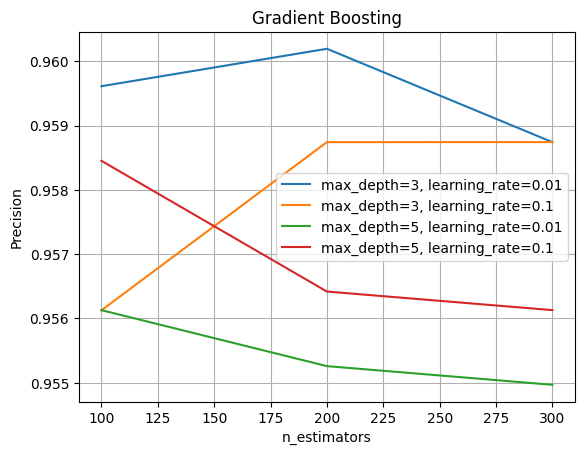

In [69]:

results_gb = gb_cv.cv_results_['mean_test_score']

plt.plot([100, 200, 300], results_gb[:3], label='max_depth=3, learning_rate=0.01')
plt.plot([100, 200, 300], results_gb[3:6], label='max_depth=3, learning_rate=0.1')
plt.plot([100, 200, 300], results_gb[6:9], label='max_depth=5, learning_rate=0.01')
plt.plot([100, 200, 300], results_gb[9:], label='max_depth=5, learning_rate=0.1')
plt.xlabel('n_estimators')
plt.ylabel('Precision')
plt.title('Gradient Boosting')
plt.grid(True)
plt.legend()
plt.show()


***Regularisation***

In [71]:
# Creating Gradient Boosting model with L2 
gb_with_reg = GradientBoostingClassifier(
    n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42, 
    subsample=0.8, min_samples_split=5, min_samples_leaf=3   # alpha is responsible for L2 
)

gb_with_reg.fit(X_train, y_train)

y_pred_gb_reg = gb_with_reg.predict(x_test)
print(f"Precision Gradient Boosting with L2 regularisation: {accuracy_score(y_test, y_pred_gb_reg)}")

Precision Gradient Boosting with L2 regularisation: 0.9454123112659698


 **XGBoost**

In [50]:
xgb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0]
}
xgb_m = xgb.XGBClassifier( use_label_encoder=False, eval_metric='logloss', random_state=42)

xgb_cv = GridSearchCV(xgb_m, param_grid=xgb_params, cv=5, scoring='accuracy')
xgb_cv.fit(X_train, y_train)

print(f"best parametrs Gradient XGBoost: {xgb_cv.best_params_}")

y_pred_xgb = xgb_cv.predict(x_test)
print(f"precision Gradient XGBoost: {accuracy_score(y_test, y_pred_xgb)}")


best parametrs Gradient XGBoost: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 300, 'subsample': 1.0}
precision Gradient XGBoost: 0.943089430894309


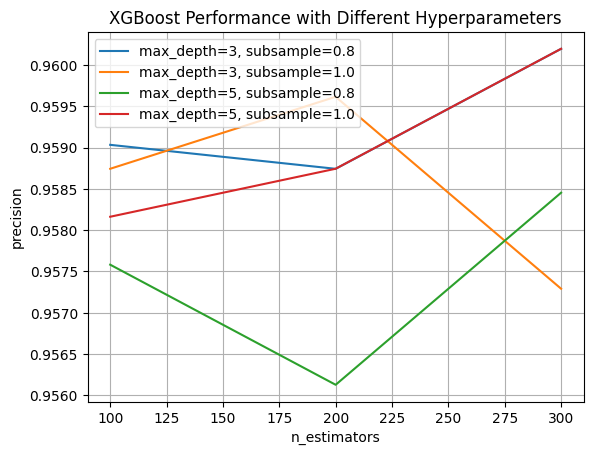

In [57]:

results_xgb = xgb_cv.cv_results_['mean_test_score']

plt.plot([100, 200, 300], results_xgb[:3], label='max_depth=3, subsample=0.8')
plt.plot([100, 200, 300], results_xgb[3:6], label='max_depth=3, subsample=1.0')
plt.plot([100, 200, 300], results_xgb[6:9], label='max_depth=5, subsample=0.8')
plt.plot([100, 200, 300], results_xgb[9:12], label='max_depth=5, subsample=1.0')
plt.xlabel('n_estimators')
plt.ylabel('precision')
plt.legend()
plt.title('XGBoost Performance with Different Hyperparameters')
plt.grid(True)
plt.show()



In [72]:
xgb_with_reg = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0],
    'alpha': [0, 0.1, 1],  # L1
    'lambda': [1, 2]  # L2 
}

xgb_model_with_reg = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')

xgb_cv_with_reg = GridSearchCV(xgb_model_with_reg, param_grid=xgb_with_reg, cv=5, scoring='accuracy')
xgb_cv_with_reg.fit(X_train, y_train)

print(f"best parametrs Gradient XGBoost with Regularisation : {xgb_cv_with_reg.best_params_}")

y_pred_xgb_reg = gb_cv.predict(x_test)
print(f"precision Gradient XGBoost with Regularisation: {accuracy_score(y_test, y_pred_xgb_reg)}")


best parametrs Gradient XGBoost with Regularisation : {'alpha': 0, 'lambda': 1, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 300, 'subsample': 1.0}
precision Gradient XGBoost with Regularisation: 0.943089430894309
